In [20]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline



In [27]:

def integrate_leapfrog(r0, v0, dt, t_final):
    """ Integration of Hamilton's equations of motion using the leapfrog method."""
    def coulomb_force(r):
        """ Coulomb force between nucleus and electron."""
        F = -1.0 / (np.linalg.norm(r)**3) * r
        return F

    t_range = np.arange(0, t_final, dt)

    # set up arrays for storing the trajectory
    r_t = np.zeros((len(t_range)+1, 2))
    v_t = np.zeros((len(t_range)+1, 2))
    r_t[0,:] = r0
    v_t[0,:] = v0

    # define local variables
    r = r0.copy()
    v = v0.copy()


    # loop over all time steps    
    for k, t in enumerate(t_range):
        # Make a leapfrog step
        if k == 0:
            F = coulomb_force(r)
        v += F * dt/2
        r += v * dt
        F = coulomb_force(r)
        v += F * dt/2

        t += dt
        r_t[k+1] = r
        v_t[k+1] = v
        
    # add t_final to t_range
    t_range = np.append(t_range, t_final)
    return r_t, v_t, t_range

def plot_orbit(r_t, t_range):
    # Plot of orbit in the xy plane
    plt.figure()
    plt.plot(r_t[:,0], r_t[:,1], label='Orbit')
    plt.axis('equal')
    plt.title('Orbit of the electron')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(0, 0, color='red', label='Nucleus')
    plt.legend()
    plt.show()
    
    
    # Plot of the x and y coordinates as a function of time
    plt.figure()
    plt.plot(t_range, r_t[:,0], label='x')
    plt.plot(t_range, r_t[:,1], label='y')
    plt.xlabel('Time')
    plt.ylabel('Coordinate')
    plt.legend()
    plt.show()
    


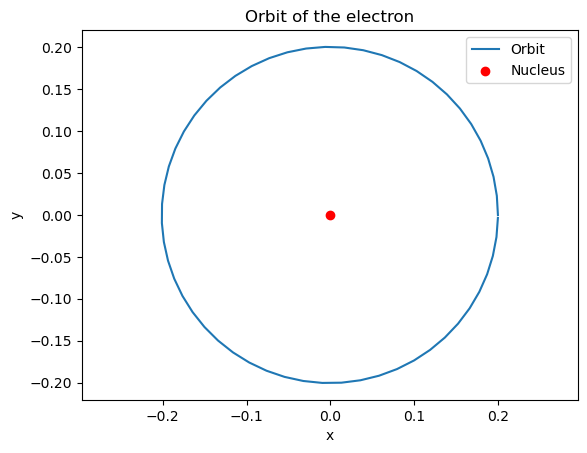

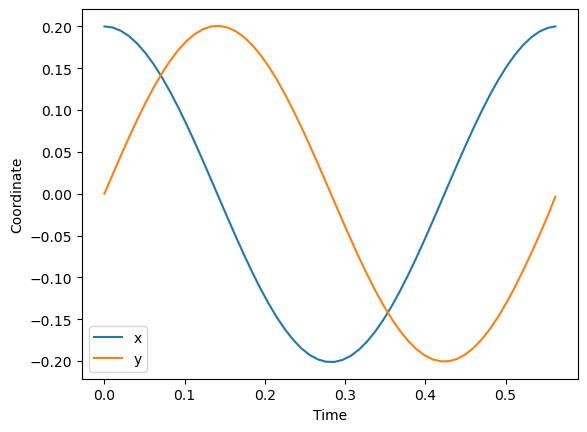

In [30]:
r0 = 0.2
v0 = 1.0/r0**.5
r = np.array([r0, 0.0])
v = np.array([0.0, v0])
dt = 0.010234
t_final = 2*np.pi*r0/v0

r_t, v_t, t_range = integrate_leapfrog(r, v, dt, t_final)



    
plot_orbit(r_t, t_range)
